In [1]:
! git clone https://github.com/rheasukthanker/understanding_dl_though_code

Cloning into 'understanding_dl_though_code'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 47 (delta 14), reused 23 (delta 10), pack-reused 0 (from 0)
Receiving objects: 100% (47/47), 13.22 KiB | 13.22 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [2]:
%cd understanding_dl_though_code/understanding_norms

/content/understanding_dl_though_code/understanding_norms


In [5]:

import random
import numpy as np
import matplotlib.pyplot as plt

def check_invariance_to_scaling(x):
    random_scale = 0.345
    return x*random_scale

def check_invariance_to_shifting(x):
    random_shift = 0.997
    return x+random_shift

def check_invariance_to_mult_by_orthogonal(x):
    A = torch.randn(16, 16)
    Q, _ = torch.linalg.qr(A)  # Q is orthogonal
    return x@Q



In [8]:
from layernorm import MyLayerNorm
from rmsnorm import MyRMSNorm
from batchnorm1d import MyBatchNorm1d
from batchnorm2d import MyBatchNorm2d
from groupnorm import MyGroupNorm
from instancenorm import MyInstanceNorm
import torch
batch_size = 32
n_features = 16
layernorm = MyLayerNorm(n_features,eps=0)
rmsnorm = MyRMSNorm(n_features,eps=0)
batchnorm1d = MyBatchNorm1d(n_features,eps=0)
x = torch.randn([batch_size,n_features])
print(check_invariance_to_scaling(x).shape)
print(check_invariance_to_shifting(x).shape)
print(check_invariance_to_mult_by_orthogonal(x).shape)
print(x.shape[-1])
print("Is layernorm invariant to:")
print("Scaling:", torch.allclose(layernorm(x),layernorm(check_invariance_to_scaling(x)),atol=1e-5))
print("Shifting:", torch.allclose(layernorm(x),layernorm(check_invariance_to_shifting(x)),atol=1e-5))
print("Orthogonal projection:", torch.allclose(layernorm(x),layernorm(check_invariance_to_mult_by_orthogonal(x)),atol=1e-5))

print("Is rmsnorm invariant to:")
print("Scaling:", torch.allclose(rmsnorm(x),rmsnorm(check_invariance_to_scaling(x)),atol=1e-5))
print("Shifting:", torch.allclose(rmsnorm(x),rmsnorm(check_invariance_to_shifting(x)),atol=1e-5))
print("Orthogonal projection:", torch.allclose(rmsnorm(x),rmsnorm(check_invariance_to_mult_by_orthogonal(x)),atol=1e-5))

print("Is batchnorm1d invariant to:")
print("Scaling:", torch.allclose(batchnorm1d(x),batchnorm1d(check_invariance_to_scaling(x)),atol=1e-5))
print("Shifting:", torch.allclose(batchnorm1d(x),batchnorm1d(check_invariance_to_shifting(x)),atol=1e-5))
print("Orthogonal projection:", torch.allclose(batchnorm1d(x),batchnorm1d(check_invariance_to_mult_by_orthogonal(x)),atol=1e-5))

# 2d inputs
inp = torch.randn(batch_size,n_features, 32, 32)
W = torch.randn(n_features,n_features,3,3)
groupnorm = MyGroupNorm(4,n_features,eps=0)
instancenorm = MyInstanceNorm(n_features,eps=0)
batchnorm2d = MyBatchNorm2d(n_features,eps=0)

print("Is groupnorm invariant to:")
print("Scaling:", torch.allclose(groupnorm(inp),groupnorm(check_invariance_to_scaling(inp)),atol=1e-5))
print("Shifting:", torch.allclose(groupnorm(inp),groupnorm(check_invariance_to_shifting(inp)),atol=1e-5))
#print("Orthogonal projection:", torch.allclose(groupnorm(inp),groupnorm(check_invariance_to_mult_by_orthogonal(inp)),atol=1e-5))

print("Is instancenorm invariant to:")
print("Scaling:", torch.allclose(instancenorm(inp),instancenorm(check_invariance_to_scaling(inp)),atol=1e-5))
print("Shifting:", torch.allclose(instancenorm(inp),instancenorm(check_invariance_to_shifting(inp)),atol=1e-5))
#print("Orthogonal projection:", torch.allclose(instancenorm(inp),instancenorm(check_invariance_to_mult_by_orthogonal(inp)),atol=1e-5))

print("Is batchnorm2d invariant to")
print("Scaling:", torch.allclose(batchnorm2d(inp),batchnorm2d(check_invariance_to_scaling(inp)),atol=1e-5))
print("Shifting:", torch.allclose(batchnorm2d(inp),batchnorm2d(check_invariance_to_shifting(inp)),atol=1e-5))
#print("Orthogonal projection:", torch.allclose(batchnorm2d(inp),batchnorm2d(check_invariance_to_mult_by_orthogonal(W,inp)),atol=1e-5))








torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
16
Is layernorm invariant to:
Scaling: True
Shifting: True
Orthogonal projection: False
Is rmsnorm invariant to:
Scaling: True
Shifting: False
Orthogonal projection: False
Is batchnorm1d invariant to:
Scaling: True
Shifting: True
Orthogonal projection: False
Is groupnorm invariant to:
Scaling: True
Shifting: True
Is instancenorm invariant to:
Scaling: True
Shifting: True
Is batchnorm2d invariant to
Scaling: True
Shifting: True


In [9]:

import torch
batch_size = 32
n_features = 16
layernorm = torch.nn.LayerNorm(n_features,eps=0)
rmsnorm = torch.nn.RMSNorm(n_features,eps=0)
batchnorm1d = torch.nn.BatchNorm1d(n_features,eps=0)
x = torch.randn([batch_size,n_features])
W = torch.randn([n_features,n_features])
print("Is layernorm invariant to:")
print("Scaling:", torch.allclose(layernorm(x@W),layernorm(check_invariance_to_scaling(x@W)),atol=1e-5))
print("Shifting:", torch.allclose(layernorm(x@W),layernorm(check_invariance_to_shifting(x@W)),atol=1e-5))
print("Orthogonal projection:", torch.allclose(layernorm(x@W),layernorm(check_invariance_to_mult_by_orthogonal(x@W)),atol=1e-5))

print("Is rmsnorm invariant to:")
print("Scaling:", torch.allclose(rmsnorm(x@W),rmsnorm(check_invariance_to_scaling(x@W)),atol=1e-5))
print("Shifting:", torch.allclose(rmsnorm(x@W),rmsnorm(check_invariance_to_shifting(x@W)),atol=1e-5))
print("Orthogonal projection:", torch.allclose(rmsnorm(x@W),rmsnorm(check_invariance_to_mult_by_orthogonal(x@W)),atol=1e-5))

print("Is batchnorm1d invariant to:")
print("Scaling:", torch.allclose(batchnorm1d(x@W),batchnorm1d(check_invariance_to_scaling(x@W)),atol=1e-5))
print("Shifting:", torch.allclose(batchnorm1d(x@W),batchnorm1d(check_invariance_to_shifting(x@W)),atol=1e-5))
print("Orthogonal projection:", torch.allclose(batchnorm1d(x@W),batchnorm1d(check_invariance_to_mult_by_orthogonal(x@W)),atol=1e-5))

# 2d inputs
inp = torch.randn(batch_size,n_features, 32, 32)
W = torch.randn(n_features,n_features,3,3)
groupnorm = torch.nn.GroupNorm(4,n_features,eps=0)
instancenorm = torch.nn.InstanceNorm2d(n_features,eps=0)
batchnorm2d = torch.nn.BatchNorm2d(n_features,eps=0)

print("Is groupnorm invariant to:")
print("Scaling:", torch.allclose(groupnorm(inp),groupnorm(check_invariance_to_scaling(inp)),atol=1e-5))
print("Shifting:", torch.allclose(groupnorm(inp),groupnorm(check_invariance_to_shifting(inp)),atol=1e-5))
#print("Orthogonal projection:", torch.allclose(groupnorm(inp),groupnorm(check_invariance_to_mult_by_orthogonal(inp)),atol=1e-5))

print("Is instancenorm invariant to:")
print("Scaling:", torch.allclose(instancenorm(inp),instancenorm(check_invariance_to_scaling(inp)),atol=1e-5))
print("Shifting:", torch.allclose(instancenorm(inp),instancenorm(check_invariance_to_shifting(inp)),atol=1e-5))
#print("Orthogonal projection:", torch.allclose(instancenorm(inp),instancenorm(check_invariance_to_mult_by_orthogonal(inp)),atol=1e-5))

print("Is batchnorm2d invariant to")
print("Scaling:", torch.allclose(batchnorm2d(inp),batchnorm2d(check_invariance_to_scaling(inp)),atol=1e-5))
print("Shifting:", torch.allclose(batchnorm2d(inp),batchnorm2d(check_invariance_to_shifting(inp)),atol=1e-5))
#print("Orthogonal projection:", torch.allclose(batchnorm2d(inp),batchnorm2d(check_invariance_to_mult_by_orthogonal(W,inp)),atol=1e-5))





Is layernorm invariant to:
Scaling: True
Shifting: True
Orthogonal projection: False
Is rmsnorm invariant to:
Scaling: True
Shifting: False
Orthogonal projection: False
Is batchnorm1d invariant to:
Scaling: True
Shifting: True
Orthogonal projection: False
Is groupnorm invariant to:
Scaling: True
Shifting: True
Is instancenorm invariant to:
Scaling: True
Shifting: True
Is batchnorm2d invariant to
Scaling: True
Shifting: True


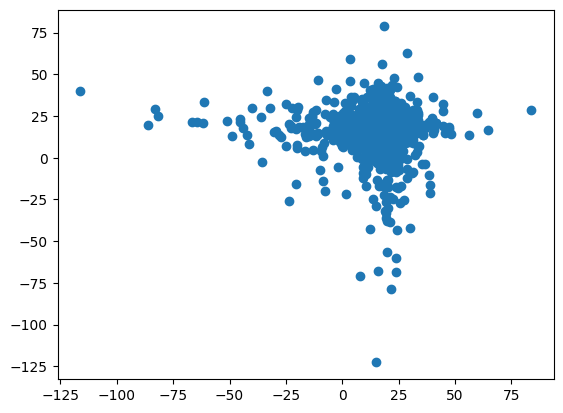

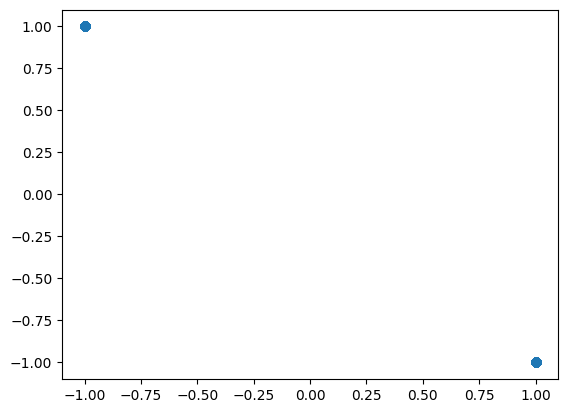

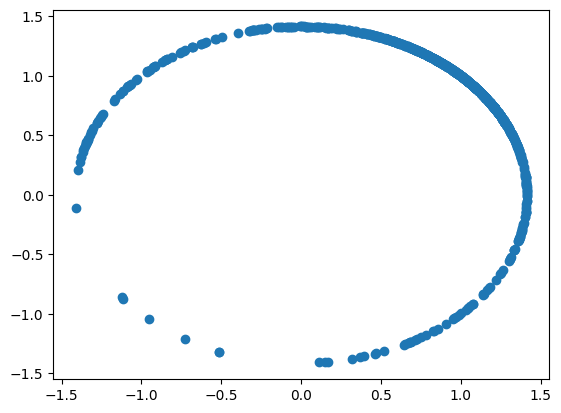

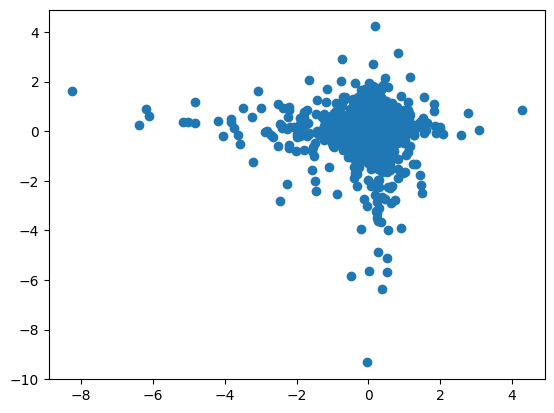

In [27]:
points = 4*torch.sin(torch.randn(1000,2))-7*torch.exp(torch.randn(1000,2))+23+4*torch.randn(1000,2)**2
# plot points
plt.scatter(points[:,0],points[:,1])
plt.show()

# center , places points on x = -y , centered around 0
layernorm_out = torch.nn.LayerNorm(2,elementwise_affine=False,eps=0)(points)
plt.scatter(layernorm_out[:,0],layernorm_out[:,1])
plt.show()

# rms norm , RMSNorm forces the summed inputs into a √n-scaled unit sphere
rmsnorm = torch.nn.RMSNorm(2,elementwise_affine=False,eps=0)
rmsnorm_out = rmsnorm(points)
plt.scatter(rmsnorm_out[:,0],rmsnorm_out[:,1])
plt.show()

# batchnorm 1d , changes only data scale
batchnorm1d = torch.nn.BatchNorm1d(2,affine=False,eps=0)
batchnorm1d_out = batchnorm1d(points)
plt.scatter(batchnorm1d_out[:,0],batchnorm1d_out[:,1])
plt.show()
